##**Name:** Yasmeen Hamdy Mohamed Shawat
##**ID:** 40-14461

##**Name:** Youssef Mohamed Aly
##**ID:** 40-8252

#Imports:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math as math
from PIL import Image

#Calculate Integral:

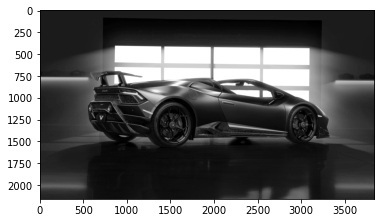

In [ ]:
file_path = "L4.jpg"
#img = mpimg.imread(file_path)
#convert to grayScale
def gray(imgName):
    img = Image.open(imgName)
    imgGray = np.zeros((img.height,img.width))
    for i in range (0,img.size[0]):
        for j in range (0,img.size[1]):
            r, g, b = img.getpixel((i,j))
            imgGray[j][i]= int(r*0.3 + g*0.59 + b * 0.11)
    return imgGray
imgray = gray('L4.jpg')
plt.figure()
plt.imshow(imgray, cmap='gray')
plt.show()

In [ ]:
def CalculateIntegral(imgArray):
  length = len(imgArray)
  width = len(imgArray[0])
  sImgArray = np.zeros((length, width))
  iiImgArray = np.zeros((length, width))
  for i in range(0, length):
    for j in range(0, width):
      if i == 0:
        sImgArray[i][j] = imgArray[i][j]
      else:
        sImgArray[i][j]= sImgArray[i-1][j] + imgArray[i][j]
  for i in range(0, length):
    for j in range(0, width):
      if j == 0 :
        iiImgArray[i][j] = sImgArray[i][j]
      else:
        iiImgArray[i][j] = iiImgArray[i][j-1] + sImgArray[i][j]
  return iiImgArray
integImg = CalculateIntegral(imgray)


##Calculate Local Sum:

In [ ]:
def CalculateLocalSum(integImg,p0,p1):
  x0,y0 = p0
  x1,y1 = p1
  sum = integImg[x1][y1]
  if (x0 == 0 and y0 == 0):
    return (sum)
  elif (x0 == 0):
    sum = sum - integImg[x1][y0-1]
    return (sum)
  elif (y0 == 0):
    sum = sum - integImg[x0-1][y1]
    return (sum)
  else:
    return  (sum - integImg[x1][y0-1] - integImg[x0-1][y1] + integImg[x0-1][y0-1])
#CalculateLocalSum(integImg,(0,0),(2159, 3839))

##Edge Detection:

In [ ]:

def EdgeDetection(integImg, kernelSize):
  #turning image into grayscale
  div = int(kernelSize/2)
  sqrtArr = np.zeros((2160,3840))
  laplaceArr = np.zeros((2160,3840))
  for i in range (div,2160-div):
    for j in range (div,3840-div):
      #first derivative
      h1 = CalculateLocalSum(integImg,(i-div,j-div),(i+div,j-1)) - CalculateLocalSum(integImg,(i-div,j+1),(i+div,j+div))
      h2 = CalculateLocalSum(integImg,(i+1,j-div),(i+div,j+div)) - CalculateLocalSum(integImg,(i-div,j-div),(i-1,j+div))
      sqrtArr[i][j] = math.sqrt((h1**2)+(h2**2))
      #second derivative
      laplaceArr[i][j] = CalculateLocalSum(integImg,(i,j),(i,j)) * ((kernelSize**2)-1) + ((CalculateLocalSum(integImg,(i-div,j-div),(i+div,j+div)) - CalculateLocalSum(integImg,(i,j),(i,j))) * -1)
  #absolute
  laplaceArr = np.absolute(laplaceArr)
  
  return sqrtArr, laplaceArr

#EdgeDetection(integImg,5)


In [ ]:
im1, im2 = EdgeDetection(integImg,121)
img1 = Image.fromarray(im1, 'RGB')
img2 = Image.fromarray(im2, 'RGB')

from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

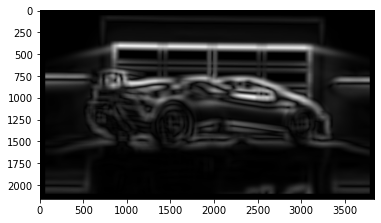

In [ ]:
plt.figure()
plt.imshow(im1, cmap='gray')
plt.show()

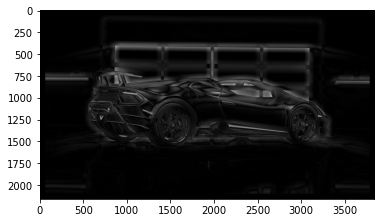

In [ ]:
plt.figure()
plt.imshow(im2, cmap='gray')
plt.show()

In [ ]:
def RefineEdge(integImg, kernelSize, ratioR ):
  result = np.zeros((2160,3840))
  div = kernelSize // 2
  for i in range (div,2160-div):
    for j in range (div, 3840-div):
      mean = CalculateLocalSum(integImg,(i-div,j-div),(i+div,j+div)) / (kernelSize ** 2)
      if (CalculateLocalSum(integImg,(i,j),(i,j)) > mean * ratioR):
        result[i][j] = CalculateLocalSum(integImg,(i,j),(i,j))
  return (result)


In [ ]:
finalResult = RefineEdge(CalculateIntegral(im1),51,1.15)

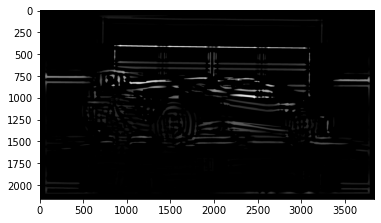

In [ ]:
max = np.amax(finalResult)
finalResult = (finalResult / max) *255

finalResultImg = Image.fromarray(finalResult)
plt.figure()
plt.imshow(finalResultImg)
plt.show()
